In [2]:
# import all relevant libraries
%matplotlib notebook
import numpy as np 
import pandas as pd
from math import pi
import seaborn as sns
from scipy.stats import norm
from numpy.random import normal
from numpy.random import random
from numpy import vstack
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import matplotlib
from warnings import catch_warnings
from warnings import simplefilter
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel)

In [77]:
df = pd.read_csv("../data/DoE_Data_1_4.csv", index_col=0)
df = df.dropna()
df = df.set_index([pd.Index(np.array(range(97)))])
df4 = df.iloc[37:]
df4

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,Res: pct. Coverage
37,20200921_1,09/21/20 17:00,25,25,0.01716,476.69884,0,0.00000,475.00000,5.0,7.10,22.5,37.040835,No,501.716,0.000034,0.000686,True,4,0.000000
38,20200921_2,09/21/20 20:20,25,25,0.01716,476.69884,25,0.01716,476.69884,5.0,7.98,23.0,38.158064,No,501.716,0.000034,0.000686,True,4,0.000000
39,20200922_1,09/22/20 0:50,50,50,0.03432,953.39768,50,0.03432,953.39768,5.0,8.76,22.5,41.467763,Yes,1003.432,0.000034,0.000686,True,4,0.108187
40,20200922_2,09/22/20 10:50,50,50,0.03432,953.39768,50,0.03432,953.39768,5.0,11.38,22.5,49.407540,Yes,1003.432,0.000034,0.000686,True,4,0.134163
41,20200922_3,09/22/20 14:25,25,25,0.01716,476.69884,0,0.00000,475.00000,5.0,11.24,23.0,47.489815,No,501.716,0.000034,0.000686,True,4,0.000000
42,20200922_4,09/22/20 20:30,25,25,0.01716,476.69884,25,0.01716,476.69884,5.0,10.82,23.3,45.354451,No,501.716,0.000034,0.000686,True,4,0.000000
43,20200923_2,09/23/20 21:45,25,25,0.01716,476.69884,0,0.00000,475.00000,7.5,9.92,22.9,43.757547,No,501.716,0.000034,0.000686,True,4,0.000000
44,20200924_1,09/24/20 0:45,50,50,0.03432,953.39768,0,0.00000,950.00000,10.0,10.34,23.0,44.731545,Yes,1003.432,0.000034,0.000686,True,4,0.126065
45,20200924_3,09/24/20 7:00,50,50,0.03432,953.39768,50,0.03432,953.39768,7.5,11.40,23.0,47.995561,Yes,1003.432,0.000034,0.000686,True,4,0.054047
46,20200924_4,09/24/20 11:00,50,50,0.03432,953.39768,50,0.03432,953.39768,10.0,11.60,23.2,48.049708,No,1003.432,0.000034,0.000686,True,4,0.000000


In [78]:
print(np.unique(df4["Growth Time (min)"]))
print(np.unique(df4["Growth He (sccm)"]))
print(df4["Relative Humidity (pct)"].max())
print(df4["Relative Humidity (pct)"].min())
print(np.unique(df4["Cooling CH4 (sccm)"]/df4["Growth CH4 (sccm)"]))

[ 5.   7.5 10. ]
[476.69884 953.39768]
60.23537567
15.50962613
[0. 1.]


In [4]:
pidf4 = df4[["ID"]].copy()
pidf4["pi_1"] = (df4["Res: pct. Coverage"]*1.1448336099)/((df4["Growth Time (min)"]*(df4["Growth CH4 (sccm)"]+df4["Growth H2 (sccm)"]+df4["Growth He (sccm)"]))**(2/3))
pidf4["pi_2"] = df4["Relative Humidity (pct)"]
pidf4["pi_3"] = df4["Annealing H2 (sccm)"]/(df4["Growth CH4 (sccm)"]+df4["Growth H2 (sccm)"]+df4["Growth He (sccm)"])
pidf4["pi_4"] = (df4["Growth CH4 (sccm)"]+df4["Growth H2 (sccm)"]+df4["Growth He (sccm)"])/(df4["Cooling CH4 (sccm)"]+df4["Cooling H2 (sccm)"]+df4["Cooling He (sccm)"])
pidf4["pi_5"] = df4["Growth CH4 (sccm)"]/(df4["Growth CH4 (sccm)"]+df4["Growth H2 (sccm)"]+df4["Growth He (sccm)"])
pidf4["pi_6"] = df4["Cooling CH4 (sccm)"]/(df4["Growth CH4 (sccm)"]+df4["Growth H2 (sccm)"]+df4["Growth He (sccm)"])
pidf4["pi_7"] = df4["Growth H2 (sccm)"]/(df4["Growth CH4 (sccm)"]+df4["Growth H2 (sccm)"]+df4["Growth He (sccm)"])
pidf4["pi_8"] = df4["Cooling H2 (sccm)"]/(df4["Growth CH4 (sccm)"]+df4["Growth H2 (sccm)"]+df4["Growth He (sccm)"])
pidf4

,ID,pi_1,pi_2,pi_3,pi_4,pi_5,pi_6,pi_7,pi_8
37,20200921_1,0.000000,37.040835,0.049829,1.056244,0.000034,0.000000,0.049829,0.000000
38,20200921_2,0.000000,38.158064,0.049829,1.000000,0.000034,0.000034,0.049829,0.049829
39,20200922_1,0.000423,41.467763,0.049829,1.000000,0.000034,0.000034,0.049829,0.049829
40,20200922_2,0.000524,49.407540,0.049829,1.000000,0.000034,0.000034,0.049829,0.049829
41,20200922_3,0.000000,47.489815,0.049829,1.056244,0.000034,0.000000,0.049829,0.000000
42,20200922_4,0.000000,45.354451,0.049829,1.000000,0.000034,0.000034,0.049829,0.049829
43,20200923_2,0.000000,43.757547,0.049829,1.056244,0.000034,0.000000,0.049829,0.000000
44,20200924_1,0.000310,44.731545,0.049829,1.056244,0.000034,0.000000,0.049829,0.000000
45,20200924_3,0.000161,47.995561,0.049829,1.000000,0.000034,0.000034,0.049829,0.049829
46,20200924_4,0.000000,48.049708,0.049829,1.000000,0.000034,0.000034,0.049829,0.049829


In [6]:
X = pidf4.iloc[:,2:].to_numpy()
y = pidf4.iloc[:,1:2].to_numpy()
print(X.shape)
print(y.shape)

(60, 7)
(60, 1)


In [8]:
pidf4["pi_2"].max()

60.23537567

In [9]:
xrange = np.array([[0.0,100.0],
                   [0.0,0.5],
                   [0.8,3.0],
                   [0.0,1.0],
                   [0.0,1.0],
                   [0.0,1.0],
                   [0.0,1.0]])

In [10]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

In [11]:
kernels = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernels, n_restarts_optimizer=9, alpha=0.025)
# fit the model
gp.fit(X, y)

/Users/aagam2/Desktop/UIUC_Offline/DoE/Statistical_Analysis/StatAnalysis/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/aagam2/Desktop/UIUC_Offline/DoE/Statistical_Analysis/StatAnalysis/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(alpha=0.025, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [12]:
meshdensity = 10

# plot the surrogate function
# ypred, ystd = predict(X, y, xrange, meshdensity, gp)

grid = np.meshgrid(*[np.linspace(i,j,meshdensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
Xmesh = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
ypred, ystd = surrogate(gp,Xmesh)

In [13]:
sampledensity = 10

# x = opt_acquisition(X, y, xrange, sampledensity, gp)

grid = np.meshgrid(*[np.linspace(i,j,sampledensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
Xsamples = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
    
    
# calculate the acquisition function for each sample
# scores = acquisition(X, Xsamples, gp)
yhat, _ = surrogate(gp, X)
best = max(yhat)
# calculate mean and stdev via surrogate function
mu, std = surrogate(gp, Xsamples)
mu = mu[:]
# calculate the probability of improvement
scores = norm.cdf((mu - best) / (np.atleast_2d(std+1E-9).T))


# locate the index of the largest scores
ix = np.argmax(scores)

# # x.shape
# actual = objective(np.atleast_2d(x))
# est, _ = surrogate(gp, np.atleast_2d(x))
# x.shape
# print('>x=[%.3f, %.3f], f()=%3f, actual=%.3f' % (x[0],x[1], est, actual))

In [14]:
print(Xsamples[ix])

[0.         0.05555556 1.04444444 0.         0.         0.
 0.        ]


In [16]:
np.linspace(0.8,3.0,10)

array([0.8       , 1.04444444, 1.28888889, 1.53333333, 1.77777778,
       2.02222222, 2.26666667, 2.51111111, 2.75555556, 3.        ])

In [26]:
y1 = np.unique(pidf4["pi_6"])[0]
y2 = np.unique(pidf4["pi_6"])[1]

In [28]:
y1plot = np.array([])
for i in range(10):
    y1plot = np.append(y1plot, ypred[1010000+(i*100000)])
y1plot

array([1.78744436e-04, 1.76797320e-04, 1.72439018e-04, 1.65822692e-04,
       1.57189359e-04, 1.46853320e-04, 1.35183167e-04, 1.22579971e-04,
       1.09454455e-04, 9.62049474e-05])

In [29]:
y2plot = np.array([])
for i in range(10):
    y2plot = np.append(y2plot, ypred[1011000+(i*100000)])
y2plot

array([1.78744326e-04, 1.76797211e-04, 1.72438912e-04, 1.65822590e-04,
       1.57189262e-04, 1.46853230e-04, 1.35183084e-04, 1.22579896e-04,
       1.09454387e-04, 9.62048880e-05])

In [30]:
y1std_plot = np.array([])
for i in range(10):
    y1std_plot = np.append(y1std_plot, ystd[1010000+(i*100000)])
y1std_plot

array([0.01963149, 0.01852129, 0.01771016, 0.01729649, 0.01733711,
       0.01782649, 0.01869885, 0.01985161, 0.02117337, 0.0225635 ])

In [31]:
y2std_plot = np.array([])
for i in range(10):
    y2std_plot = np.append(y2std_plot, ystd[1011000+(i*100000)])
y2std_plot

array([0.01963151, 0.01852132, 0.01771018, 0.01729651, 0.01733713,
       0.01782651, 0.01869888, 0.01985163, 0.02117338, 0.02256352])

<IPython.core.display.Javascript object>


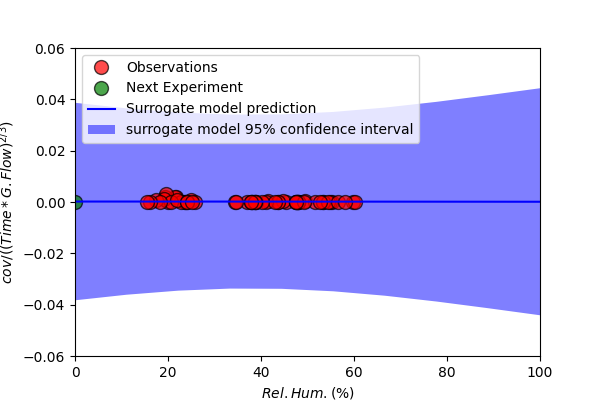

In [35]:
f = plt.figure(figsize=(6,4))
#ax = plt.gca()
ax = f.add_subplot()
Xmesh = np.atleast_2d(np.linspace(0, 100, 10)).T
ax.plot(X[:,0], y, 'ro', markersize=10, label='Observations', mew=1, mec='k', alpha=0.7)
ax.plot(Xsamples[ix][0], ypred[1010000], 'go', markersize=10, label='Next Experiment', mew=1, mec='k', alpha=0.7)
ax.plot(Xmesh, y1plot, 'b-', label='Surrogate model prediction')
ax.fill(np.concatenate([Xmesh, Xmesh[::-1]]),
        np.concatenate([y1plot - 1.9600 * y1std_plot,
                        (y1plot + 1.9600 * y1std_plot)[::-1]]),
        alpha=.5, fc='b', ec='None', label='surrogate model 95% confidence interval')
ax.set_xlim(0, 100)
ax.set_xlabel('$Rel. Hum. (\%)$')
ax.set_ylabel('$cov/((Time * G. Flow)^{2/3})$')
ax.set_ylim(-0.06, 0.06)
ax.legend(loc='upper left')

<IPython.core.display.Javascript object>


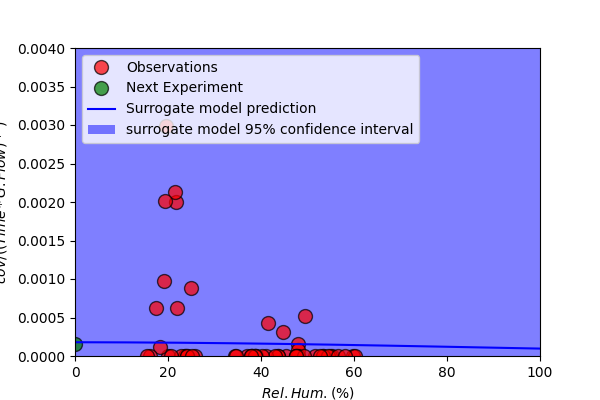

In [36]:
f = plt.figure(figsize=(6,4))
#ax = plt.gca()
ax = f.add_subplot()
Xmesh = np.atleast_2d(np.linspace(0, 100, 10)).T
ax.plot(X[:,0], y, 'ro', markersize=10, label='Observations', mew=1, mec='k', alpha=0.7)
ax.plot(Xsamples[ix][0], ypred[9450040], 'go', markersize=10, label='Next Experiment', mew=1, mec='k', alpha=0.7)
ax.plot(Xmesh, y1plot, 'b-', label='Surrogate model prediction')
ax.fill(np.concatenate([Xmesh, Xmesh[::-1]]),
        np.concatenate([y1plot - 1.9600 * y1std_plot,
                        (y1plot + 1.9600 * y1std_plot)[::-1]]),
        alpha=.5, fc='b', ec='None', label='surrogate model 95% confidence interval')
ax.set_xlim(0, 100)
ax.set_xlabel('$Rel. Hum. (\%)$')
ax.set_ylabel('$cov/((Time * G. Flow)^{2/3})$')
ax.set_ylim(0, 0.004)
ax.legend(loc='upper left')

In [22]:
from mpl_toolkits.mplot3d import Axes3D

In [27]:
y2

3.4202616619760984e-05

In [ ]:
# x   = np.linspace(1,5,100)
# y1  = np.ones(x.size)
# y2  = np.ones(x.size)*2
# y3  = np.ones(x.size)*3
# z   = np.sin(x/2)

Xmesh = np.atleast_2d(np.linspace(0, 100, 10)).T

pl.figure()
ax = pl.subplot(projection='3d')
ax.plot(Xmesh, y1, z, color='r')
ax.plot(Xmesh, y2, z, color='g')
ax.plot(Xmesh, y3, z, color='b')

ax.add_collection3d(pl.fill_between(Xmesh, 0.95*z, 1.05*z, color='r', alpha=0.3), zs=1, zdir='y')
ax.add_collection3d(pl.fill_between(Xmesh, 0.90*z, 1.10*z, color='g', alpha=0.3), zs=2, zdir='y')
ax.add_collection3d(pl.fill_between(Xmesh, 0.85*z, 1.15*z, color='b', alpha=0.3), zs=3, zdir='y')

ax.set_xlabel('$Rel. Hum. (\%)$')
ax.set_zlabel('Resistance (%)')

# DoE 1-4

In [55]:
df = pd.read_csv("../data/DoE_Data_1_4.csv", index_col=0)
df = df.dropna()
df = df.set_index([pd.Index(np.array(range(97)))])
df14 = df
df14

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,Res: pct. Coverage
0,20200131_1,01/31/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,1.90,23.2,24.681526,Maybe,201.000,0.004975,0.010000,False,1,0.000000
1,20200201_1,02/01/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,1.74,23.0,24.697922,No,201.000,0.004975,0.010000,False,1,0.000000
2,20200202_1,02/02/20 0:00,500,500,5.00000,500.00000,0,0.00000,500.00000,5.0,5.30,23.1,31.548652,Yes,1005.000,0.004975,0.010000,False,1,0.627440
3,20200207_1,02/07/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,-1.86,23.2,18.791646,No,201.000,0.004975,0.010000,False,1,0.000000
4,20200207_2,02/07/20 0:00,500,500,5.00000,500.00000,0,0.00000,500.00000,15.0,-1.86,23.2,18.791646,Yes,1005.000,0.004975,0.010000,False,1,0.095754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,20210114_1,01/14/21 7:30,25,25,0.01716,476.69884,25,0.01716,476.69884,7.5,0.26,21.7,24.030716,Maybe,501.716,0.000034,0.000686,True,4,0.000000
93,20210114_2,01/14/21 10:00,25,25,0.01716,476.69884,25,0.01716,476.69884,10.0,1.30,22.9,24.077087,No,501.716,0.000034,0.000686,True,4,0.000000
94,20210115_1,01/15/21 9:00,50,50,0.03432,953.39768,50,0.03432,953.39768,5.0,1.10,22.0,25.068069,No,1003.432,0.000034,0.000686,True,4,0.000000
95,20210120_1,01/20/21 9:00,50,50,0.03432,953.39768,50,0.03432,953.39768,7.5,-4.82,22.0,16.209052,No,1003.432,0.000034,0.000686,True,4,0.000000


In [56]:
pidf14 = df14[["ID"]].copy()
pidf14["pi_1"] = (df14["Res: pct. Coverage"]*1.1448336099)/((df14["Growth Time (min)"]*(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"]))**(2/3))
pidf14["pi_2"] = df14["Relative Humidity (pct)"]
pidf14["pi_3"] = df14["Annealing H2 (sccm)"]/(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])
pidf14["pi_4"] = (df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])/(df14["Cooling CH4 (sccm)"]+df14["Cooling H2 (sccm)"]+df14["Cooling He (sccm)"])
pidf14["pi_5"] = df14["Growth CH4 (sccm)"]/(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])
pidf14["pi_6"] = df14["Cooling CH4 (sccm)"]/(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])
pidf14["pi_7"] = df14["Growth H2 (sccm)"]/(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])
pidf14["pi_8"] = df14["Cooling H2 (sccm)"]/(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])
pidf14

,ID,pi_1,pi_2,pi_3,pi_4,pi_5,pi_6,pi_7,pi_8
0,20200131_1,0.000000,24.681526,0.497512,2.01,0.004975,0.000000,0.497512,0.000000
1,20200201_1,0.000000,24.697922,0.497512,2.01,0.004975,0.000000,0.497512,0.000000
2,20200202_1,0.002448,31.548652,0.497512,2.01,0.004975,0.000000,0.497512,0.000000
3,20200207_1,0.000000,18.791646,0.497512,2.01,0.004975,0.000000,0.497512,0.000000
4,20200207_2,0.000180,18.791646,0.497512,2.01,0.004975,0.000000,0.497512,0.000000
...,...,...,...,...,...,...,...,...,...
92,20210114_1,0.000000,24.030716,0.049829,1.00,0.000034,0.000034,0.049829,0.049829
93,20210114_2,0.000000,24.077087,0.049829,1.00,0.000034,0.000034,0.049829,0.049829
94,20210115_1,0.000000,25.068069,0.049829,1.00,0.000034,0.000034,0.049829,0.049829
95,20210120_1,0.000000,16.209052,0.049829,1.00,0.000034,0.000034,0.049829,0.049829


In [57]:
print(np.unique(pidf14["pi_3"]))
print(np.unique(pidf14["pi_4"]))
print(np.unique(pidf14["pi_5"]))
print(np.unique(pidf14["pi_6"]))
print(np.unique(pidf14["pi_7"]))
print(np.unique(pidf14["pi_8"]))

[0.04982899 0.49751244 0.49751244 0.49751244]
[1.         1.05624421 2.01       2.01      ]
[3.42026166e-05 4.97512438e-03]
[0.00000000e+00 3.42026166e-05]
[0.04982899 0.49751244 0.49751244 0.49751244]
[0.         0.04982899]


In [61]:
np.unique(pidf14["pi_3"])[3]-np.unique(pidf14["pi_3"])[2]

5.551115123125783e-17

In [39]:
xrange = np.array([[0.0,100.0],
                   [0.0,0.5],
                   [0.8,3.0],
                   [0.0,1.0],
                   [0.0,1.0],
                   [0.0,1.0],
                   [0.0,1.0]])

In [49]:
# for i,j in zip(xrange[:,0],xrange[:,1]):
#     print(np.linspace(i,j,meshdensity)[:])

In [50]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

In [51]:
kernels = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernels, n_restarts_optimizer=9, alpha=0.025)
# fit the model
gp.fit(X, y)

/Users/aagam2/Desktop/UIUC_Offline/DoE/Statistical_Analysis/StatAnalysis/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/aagam2/Desktop/UIUC_Offline/DoE/Statistical_Analysis/StatAnalysis/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(alpha=0.025, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [52]:
meshdensity = 10

# plot the surrogate function
# ypred, ystd = predict(X, y, xrange, meshdensity, gp)

grid = np.meshgrid(*[np.linspace(i,j,meshdensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
Xmesh = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
ypred, ystd = surrogate(gp,Xmesh)

In [53]:
sampledensity = 10

# x = opt_acquisition(X, y, xrange, sampledensity, gp)

grid = np.meshgrid(*[np.linspace(i,j,sampledensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
Xsamples = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
    
    
# calculate the acquisition function for each sample
# scores = acquisition(X, Xsamples, gp)
yhat, _ = surrogate(gp, X)
best = max(yhat)
# calculate mean and stdev via surrogate function
mu, std = surrogate(gp, Xsamples)
mu = mu[:]
# calculate the probability of improvement
scores = norm.cdf((mu - best) / (np.atleast_2d(std+1E-9).T))


# locate the index of the largest scores
ix = np.argmax(scores)

KeyboardInterrupt: 

In [ ]:
print(Xsamples[ix])

New trial - 5 variables

In [62]:
df = pd.read_csv("../data/DoE_Data_1_4.csv", index_col=0)
df = df.dropna()
df = df.set_index([pd.Index(np.array(range(97)))])
df14 = df
df14

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,Res: pct. Coverage
0,20200131_1,01/31/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,1.90,23.2,24.681526,Maybe,201.000,0.004975,0.010000,False,1,0.000000
1,20200201_1,02/01/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,1.74,23.0,24.697922,No,201.000,0.004975,0.010000,False,1,0.000000
2,20200202_1,02/02/20 0:00,500,500,5.00000,500.00000,0,0.00000,500.00000,5.0,5.30,23.1,31.548652,Yes,1005.000,0.004975,0.010000,False,1,0.627440
3,20200207_1,02/07/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,-1.86,23.2,18.791646,No,201.000,0.004975,0.010000,False,1,0.000000
4,20200207_2,02/07/20 0:00,500,500,5.00000,500.00000,0,0.00000,500.00000,15.0,-1.86,23.2,18.791646,Yes,1005.000,0.004975,0.010000,False,1,0.095754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,20210114_1,01/14/21 7:30,25,25,0.01716,476.69884,25,0.01716,476.69884,7.5,0.26,21.7,24.030716,Maybe,501.716,0.000034,0.000686,True,4,0.000000
93,20210114_2,01/14/21 10:00,25,25,0.01716,476.69884,25,0.01716,476.69884,10.0,1.30,22.9,24.077087,No,501.716,0.000034,0.000686,True,4,0.000000
94,20210115_1,01/15/21 9:00,50,50,0.03432,953.39768,50,0.03432,953.39768,5.0,1.10,22.0,25.068069,No,1003.432,0.000034,0.000686,True,4,0.000000
95,20210120_1,01/20/21 9:00,50,50,0.03432,953.39768,50,0.03432,953.39768,7.5,-4.82,22.0,16.209052,No,1003.432,0.000034,0.000686,True,4,0.000000


In [63]:
pidf14 = df14[["ID"]].copy()
pidf14["pi_1"] = (df14["Res: pct. Coverage"]*1.1448336099)/((df14["Growth Time (min)"]*(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"]))**(2/3))
pidf14["pi_2"] = df14["Relative Humidity (pct)"]
pidf14["pi_3"] = df14["Annealing H2 (sccm)"]/(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])
pidf14["pi_4"] = (df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])/(df14["Cooling CH4 (sccm)"]+df14["Cooling H2 (sccm)"]+df14["Cooling He (sccm)"])
pidf14["pi_5"] = df14["Growth CH4 (sccm)"]/(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])
pidf14["pi_6"] = df14["Cooling CH4 (sccm)"]/(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])
# pidf14["pi_7"] = df14["Growth H2 (sccm)"]/(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])
# pidf14["pi_8"] = df14["Cooling H2 (sccm)"]/(df14["Growth CH4 (sccm)"]+df14["Growth H2 (sccm)"]+df14["Growth He (sccm)"])
pidf14

,ID,pi_1,pi_2,pi_3,pi_4,pi_5,pi_6
0,20200131_1,0.000000,24.681526,0.497512,2.01,0.004975,0.000000
1,20200201_1,0.000000,24.697922,0.497512,2.01,0.004975,0.000000
2,20200202_1,0.002448,31.548652,0.497512,2.01,0.004975,0.000000
3,20200207_1,0.000000,18.791646,0.497512,2.01,0.004975,0.000000
4,20200207_2,0.000180,18.791646,0.497512,2.01,0.004975,0.000000
...,...,...,...,...,...,...,...
92,20210114_1,0.000000,24.030716,0.049829,1.00,0.000034,0.000034
93,20210114_2,0.000000,24.077087,0.049829,1.00,0.000034,0.000034
94,20210115_1,0.000000,25.068069,0.049829,1.00,0.000034,0.000034
95,20210120_1,0.000000,16.209052,0.049829,1.00,0.000034,0.000034


In [67]:
X = pidf14.iloc[:,2:].to_numpy()
y = pidf14.iloc[:,1:2].to_numpy()
print(X.shape)
print(y.shape)

(97, 5)
(97, 1)


In [68]:
xrange = np.array([[0.0,100.0],
                   [0.0,0.5],
                   [0.8,3.0],
                   [0.0,1.0],
                   [0.0,1.0]])

In [69]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

In [70]:
kernels = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernels, n_restarts_optimizer=9, alpha=0.025)
# fit the model
gp.fit(X, y)

/Users/aagam2/Desktop/UIUC_Offline/DoE/Statistical_Analysis/StatAnalysis/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/Users/aagam2/Desktop/UIUC_Offline/DoE/Statistical_Analysis/StatAnalysis/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(alpha=0.025, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [ ]:
meshdensity = 10

# plot the surrogate function
# ypred, ystd = predict(X, y, xrange, meshdensity, gp)

grid = np.meshgrid(*[np.linspace(i,j,meshdensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
Xmesh = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
ypred, ystd = surrogate(gp,Xmesh)

In [ ]:
sampledensity = 10

# x = opt_acquisition(X, y, xrange, sampledensity, gp)

grid = np.meshgrid(*[np.linspace(i,j,sampledensity)[:] for i,j in zip(xrange[:,0],xrange[:,1])])
Xsamples = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
    
    
# calculate the acquisition function for each sample
# scores = acquisition(X, Xsamples, gp)
yhat, _ = surrogate(gp, X)
best = max(yhat)
# calculate mean and stdev via surrogate function
mu, std = surrogate(gp, Xsamples)
mu = mu[:]
# calculate the probability of improvement
scores = norm.cdf((mu - best) / (np.atleast_2d(std+1E-9).T))


# locate the index of the largest scores
ix = np.argmax(scores)

# DoE Set 4

In [4]:
# Load the data
df = pd.read_csv("../data/DoE_Data_1_4.csv", index_col=0)
# Drop experiments without a value for %RH
df = df.dropna()
# Select experiments upto Set 3
df4 = df.loc[(df["CP: Set No"]>3)]
# Reset indexing
df4 = df4.set_index([pd.Index(np.array(range(df4.shape[0])))])

df4

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,Res: pct. Coverage
0,20200921_1,09/21/20 17:00,25,25,0.01716,476.69884,0,0.00000,475.00000,5.0,7.10,22.5,37.040835,No,501.716,0.000034,0.000686,True,4,0.000000
1,20200921_2,09/21/20 20:20,25,25,0.01716,476.69884,25,0.01716,476.69884,5.0,7.98,23.0,38.158064,No,501.716,0.000034,0.000686,True,4,0.000000
2,20200922_1,09/22/20 0:50,50,50,0.03432,953.39768,50,0.03432,953.39768,5.0,8.76,22.5,41.467763,Yes,1003.432,0.000034,0.000686,True,4,0.108187
3,20200922_2,09/22/20 10:50,50,50,0.03432,953.39768,50,0.03432,953.39768,5.0,11.38,22.5,49.407540,Yes,1003.432,0.000034,0.000686,True,4,0.134163
4,20200922_3,09/22/20 14:25,25,25,0.01716,476.69884,0,0.00000,475.00000,5.0,11.24,23.0,47.489815,No,501.716,0.000034,0.000686,True,4,0.000000
5,20200922_4,09/22/20 20:30,25,25,0.01716,476.69884,25,0.01716,476.69884,5.0,10.82,23.3,45.354451,No,501.716,0.000034,0.000686,True,4,0.000000
6,20200923_2,09/23/20 21:45,25,25,0.01716,476.69884,0,0.00000,475.00000,7.5,9.92,22.9,43.757547,No,501.716,0.000034,0.000686,True,4,0.000000
7,20200924_1,09/24/20 0:45,50,50,0.03432,953.39768,0,0.00000,950.00000,10.0,10.34,23.0,44.731545,Yes,1003.432,0.000034,0.000686,True,4,0.126065
8,20200924_3,09/24/20 7:00,50,50,0.03432,953.39768,50,0.03432,953.39768,7.5,11.40,23.0,47.995561,Yes,1003.432,0.000034,0.000686,True,4,0.054047
9,20200924_4,09/24/20 11:00,50,50,0.03432,953.39768,50,0.03432,953.39768,10.0,11.60,23.2,48.049708,No,1003.432,0.000034,0.000686,True,4,0.000000


In [5]:
# Create new dataframe with the experiment ID, output, continuous inputs and discrete inputs (in that order)
pidf4 = df4[["ID"]].copy()
pidf4["Coverage"] = df4["Res: pct. Coverage"]
pidf4["RH"] = df4["Relative Humidity (pct)"]
pidf4["Time"] = df4["Growth Time (min)"]
pidf4["G Flow"] = df4["Growth CH4 (sccm)"]+df4["Growth H2 (sccm)"]+df4["Growth He (sccm)"]
pidf4["Cool/Grow CH4"] = df4["Cooling CH4 (sccm)"]/df4["Growth CH4 (sccm)"]

pidf4

,ID,Coverage,RH,Time,G Flow,Cool/Grow CH4
0,20200921_1,0.000000,37.040835,5.0,501.716,0.0
1,20200921_2,0.000000,38.158064,5.0,501.716,1.0
2,20200922_1,0.108187,41.467763,5.0,1003.432,1.0
3,20200922_2,0.134163,49.407540,5.0,1003.432,1.0
4,20200922_3,0.000000,47.489815,5.0,501.716,0.0
5,20200922_4,0.000000,45.354451,5.0,501.716,1.0
6,20200923_2,0.000000,43.757547,7.5,501.716,0.0
7,20200924_1,0.126065,44.731545,10.0,1003.432,0.0
8,20200924_3,0.054047,47.995561,7.5,1003.432,1.0
9,20200924_4,0.000000,48.049708,10.0,1003.432,1.0


In [6]:
X = pidf4.iloc[:,2:].to_numpy()
y = pidf4.iloc[:,1:2].to_numpy()
print(X.shape)
print(y.shape)

(60, 4)
(60, 1)


In [58]:
xrange = np.array([[15.0,65.0], # RH (%)
                   [3.0,12.0], # Time (min)
                   [400,1100], # G Flow (sccm)
                   [0.0,1.0]]) # C CH4 / G CH4

In [59]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

In [60]:
kernels = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernels, n_restarts_optimizer=9, alpha=0.025)
# fit the model
gp.fit(X, y)

GaussianProcessRegressor(alpha=0.025, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [64]:
meshdensity = 50

# time_line = np.sort(np.concatenate((np.linspace(xrange[1,0], xrange[1,1], meshdensity),np.unique(X[:,1]))))

# plot the surrogate function
grid = np.meshgrid(*[np.sort(np.unique(np.concatenate((np.linspace(xrange[i,0], xrange[i,1], meshdensity),np.unique(X[:,i]))))) if np.unique(X[:,i]).shape[0]<=10 else np.linspace(xrange[i,0], xrange[i,1], meshdensity) for i in range(xrange.shape[0])])
Xmesh = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
ypred, ystd = surrogate(gp,Xmesh)

In [66]:
# calculate the acquisition function for each sample
# scores = acquisition(X, Xsamples, gp)
yhat, ybar = surrogate(gp, X)
best = max(yhat)
# calculate mean and stdev via surrogate function
Xsamples = Xmesh
mu = ypred
std = ystd
# calculate the probability of improvement
scores = norm.cdf((mu - best) / (np.atleast_2d(std+1E-9).T))

# locate the index of the largest scores
ix = np.argmax(scores)

In [67]:
print("[RH, Time, G Flow, C/G CH4]: ", Xsamples[ix])

[RH, Time, G Flow, C/G CH4]:  [2.11224490e+01 1.07142857e+01 1.00343200e+03 3.46938776e-01]


In [68]:
plot_df = pd.DataFrame(np.concatenate((Xmesh, np.atleast_2d(ypred), np.atleast_2d(ystd).T), axis=1), columns=["RH","Time","G Flow", "C/G CH4", "ypred","ystd"])
plot_df

,RH,Time,G Flow,C/G CH4,ypred,ystd
0,15.0,3.0,400.0,0.000000,4.315775e-120,0.153595
1,15.0,3.0,400.0,0.020408,4.312923e-120,0.153595
2,15.0,3.0,400.0,0.040816,4.309974e-120,0.153595
3,15.0,3.0,400.0,0.061224,4.306928e-120,0.153595
4,15.0,3.0,400.0,0.081633,4.303785e-120,0.153595
...,...,...,...,...,...,...
6889995,65.0,12.0,1100.0,0.918367,1.234568e-110,0.153595
6889996,65.0,12.0,1100.0,0.938776,1.235423e-110,0.153595
6889997,65.0,12.0,1100.0,0.959184,1.236251e-110,0.153595
6889998,65.0,12.0,1100.0,0.979592,1.237051e-110,0.153595


In [69]:
time_val = np.unique(np.sort(np.append(np.unique(X[:,1]),Xsamples[ix][1])))
gflow_val = np.unique(np.sort(np.append(np.unique(X[:,2]),Xsamples[ix][2])))
cgch4_val = np.unique(np.sort(np.append(np.unique(X[:,3]),Xsamples[ix][3])))
print(time_val)
print(gflow_val)
print(cgch4_val)

[ 5.          7.5        10.         10.71428571]
[ 501.716 1003.432]
[0.         0.34693878 1.        ]


In [74]:
exp_df = pd.DataFrame(np.concatenate((X, np.atleast_2d(y)), axis=1), columns=["RH","Time","G Flow","C/G CH4","y"])

exp_df_c0_g0 = exp_df[(exp_df["C/G CH4"]==cgch4_val[0]) & (exp_df["G Flow"]==gflow_val[0])]
exp_df_c1_g0 = exp_df[(exp_df["C/G CH4"]==cgch4_val[1]) & (exp_df["G Flow"]==gflow_val[0])]
exp_df_c2_g0 = exp_df[(exp_df["C/G CH4"]==cgch4_val[2]) & (exp_df["G Flow"]==gflow_val[0])]

exp_df_c0_g1 = exp_df[(exp_df["C/G CH4"]==cgch4_val[0]) & (exp_df["G Flow"]==gflow_val[1])]
exp_df_c1_g1 = exp_df[(exp_df["C/G CH4"]==cgch4_val[1]) & (exp_df["G Flow"]==gflow_val[1])]
exp_df_c2_g1 = exp_df[(exp_df["C/G CH4"]==cgch4_val[2]) & (exp_df["G Flow"]==gflow_val[1])]
print(exp_df.shape)
print(exp_df_c0_g0.shape)
print(exp_df_c1_g0.shape)
print(exp_df_c2_g0.shape)
print(exp_df_c0_g1.shape)
print(exp_df_c1_g1.shape)
print(exp_df_c2_g1.shape)

(60, 5)
(10, 5)
(10, 5)
(10, 5)
(10, 5)
(10, 5)
(10, 5)


In [75]:
# plot_df[(plot_df["Time"]==time_val[0])]

In [77]:
x   = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["RH"])

y000  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Time"])
y100  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Time"])
y200  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Time"])
y300  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Time"])

y001  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Time"])
y101  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Time"])
y201  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Time"])
y301  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Time"])

y002  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Time"])
y102  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Time"])
y202  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Time"])
y302  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Time"])

y010  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Time"])
y110  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Time"])
y210  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Time"])
y310  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Time"])

y011  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Time"])
y111  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Time"])
y211  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Time"])
y311  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Time"])

y012  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Time"])
y112  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Time"])
y212  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Time"])
y312  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Time"])


z000  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])
z100  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])
z200  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])
z300  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])

z001  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])
z101  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])
z201  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])
z301  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])

z002  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])
z102  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])
z202  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])
z302  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])

z010  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])
z110  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])
z210  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])
z310  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])

z011  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])
z111  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])
z211  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])
z311  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])

z012  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])
z112  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])
z212  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])
z312  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])

s000  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])
s100  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])
s200  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])
s300  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])

s001  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])
s101  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])
s201  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])
s301  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])

s002  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])
s102  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])
s202  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])
s302  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])

s010  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])
s110  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])
s210  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])
s310  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])

s011  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])
s111  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])
s211  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])
s311  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])

s012  = np.array(plot_df[(plot_df["Time"]==time_val[0]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])
s112  = np.array(plot_df[(plot_df["Time"]==time_val[1]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])
s212  = np.array(plot_df[(plot_df["Time"]==time_val[2]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])
s312  = np.array(plot_df[(plot_df["Time"]==time_val[3]) & (plot_df["G Flow"]==gflow_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])

Fig 1: G Flow = 500; C/G CH4 = 0
Fig 2: G Flow = 500; C/G CH4 = 0.347
Fig 3: G Flow = 500; C/G CH4 = 1
Fig 4: G Flow = 1000; C/G CH4 = 0
Fig 5: G Flow = 1000; C/G CH4 = 0.347
Fig 6: G Flow = 1000; C/G CH4 = 1

<IPython.core.display.Javascript object>


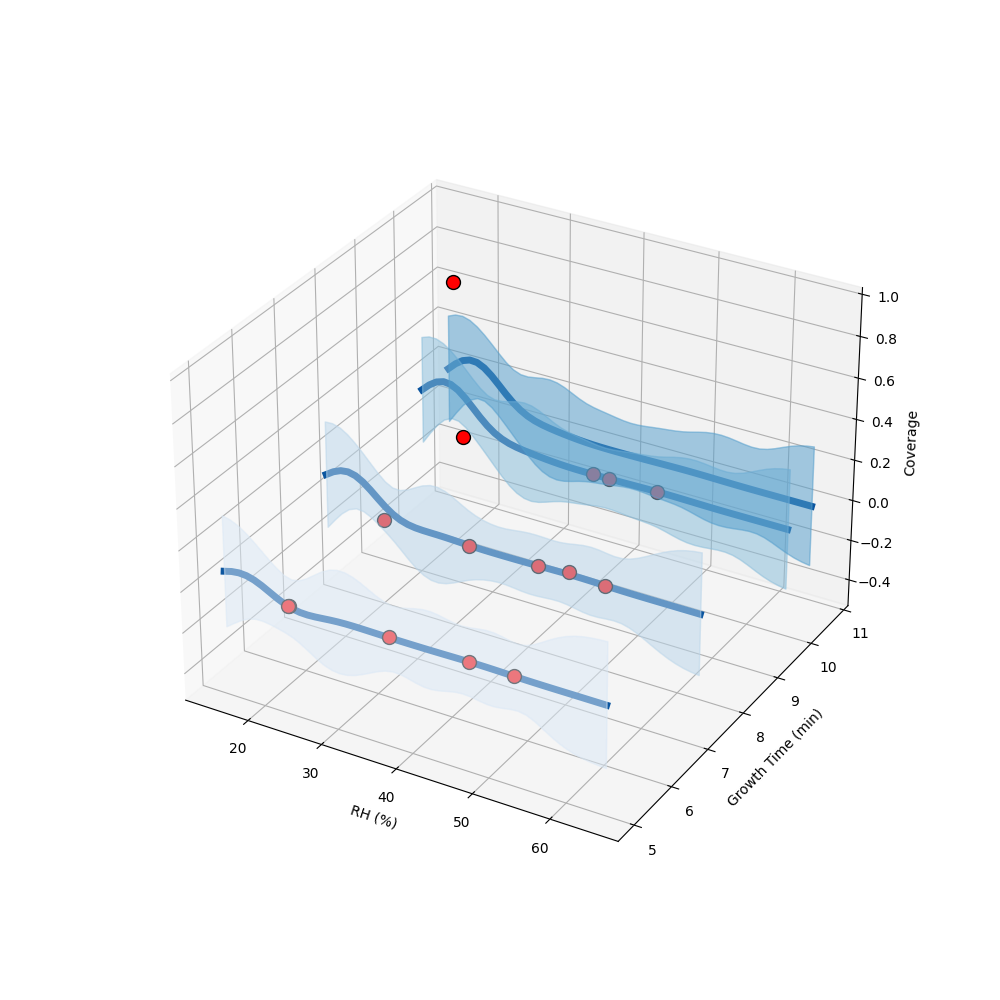

(-0.5, 1.0)

In [82]:
# Fig 1: G Flow = 500; C/G CH4 = 0

pl.figure(figsize=(10,10))
ax = pl.subplot(projection='3d')

ax.plot(x, y000, z000, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y100, z100, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y200, z200, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y300, z300, color=sns.color_palette("Blues")[5], linewidth = 5)

ax.add_collection3d(pl.fill_between(x, (z000 - 1.9600*s000), (z000 + 1.9600*s000), color=sns.color_palette("Blues")[0], alpha=0.3), zs=time_val[0], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z100 - 1.9600*s100), (z100 + 1.9600*s100), color=sns.color_palette("Blues")[1], alpha=0.3), zs=time_val[1], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z200 - 1.9600*s200), (z200 + 1.9600*s200), color=sns.color_palette("Blues")[2], alpha=0.3), zs=time_val[2], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z300 - 1.9600*s300), (z300 + 1.9600*s300), color=sns.color_palette("Blues")[3], alpha=0.3), zs=time_val[3], zdir='y')

ax.plot(exp_df_c0_g0["RH"], exp_df_c0_g0["Time"], exp_df_c0_g0["y"],'ro', markersize=10, label='Observations', mew=1, mec='k')

# ax.plot(Xsamples[ix][0], Xsamples[ix][2], ypred[ix][0],'go', markersize=15, label='Observations', mew=1, mec='k')

ax.set_xlabel('RH (%)')
ax.set_ylabel("Growth Time (min)")
ax.set_zlabel('Coverage')

ax.set_zlim(-1,1)

<IPython.core.display.Javascript object>


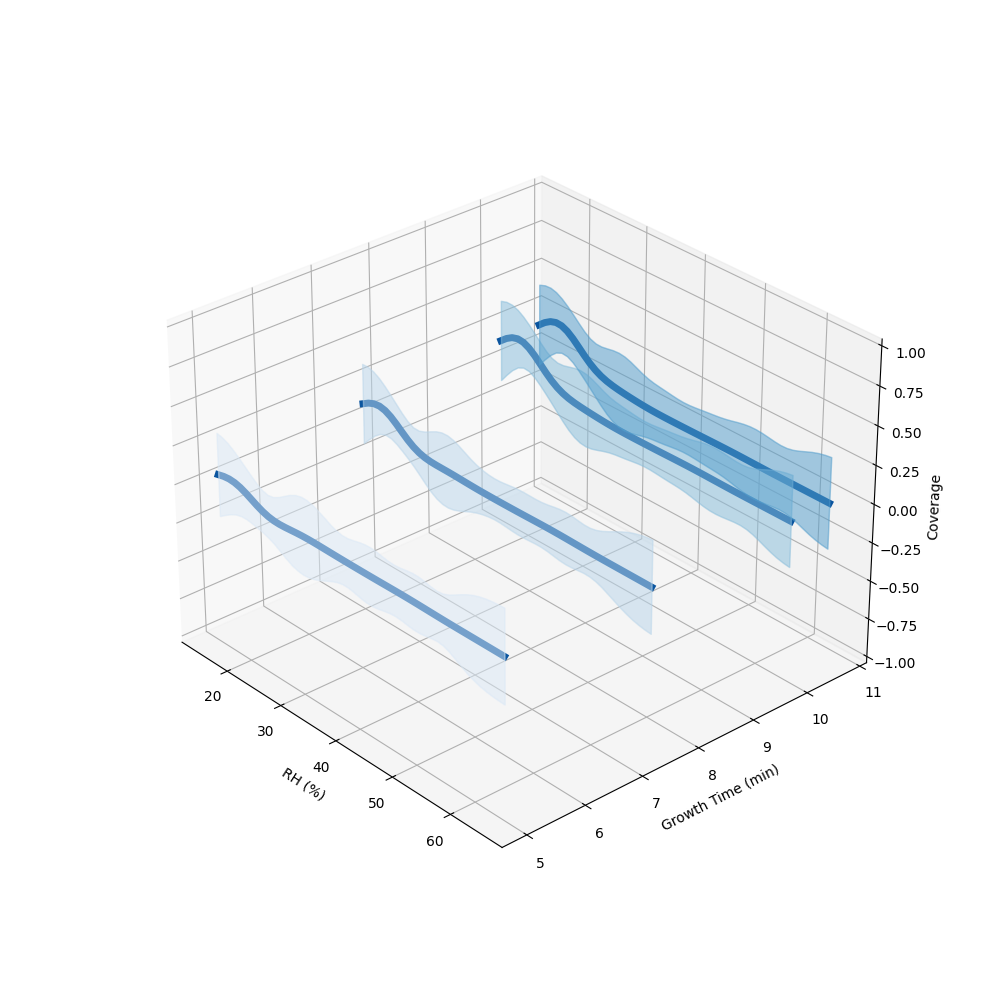

(-1.0, 1.0)

In [83]:
# Fig 2: G Flow = 500; C/G CH4 = 0.347

pl.figure(figsize=(10,10))
ax = pl.subplot(projection='3d')

ax.plot(x, y001, z001, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y101, z101, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y201, z201, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y301, z301, color=sns.color_palette("Blues")[5], linewidth = 5)

ax.add_collection3d(pl.fill_between(x, (z001 - 1.9600*s001), (z001 + 1.9600*s001), color=sns.color_palette("Blues")[0], alpha=0.3), zs=time_val[0], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z101 - 1.9600*s101), (z101 + 1.9600*s101), color=sns.color_palette("Blues")[1], alpha=0.3), zs=time_val[1], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z201 - 1.9600*s201), (z201 + 1.9600*s201), color=sns.color_palette("Blues")[2], alpha=0.3), zs=time_val[2], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z301 - 1.9600*s301), (z301 + 1.9600*s301), color=sns.color_palette("Blues")[3], alpha=0.3), zs=time_val[3], zdir='y')

ax.plot(exp_df_c1_g0["RH"], exp_df_c1_g0["Time"], exp_df_c1_g0["y"],'ro', markersize=10, label='Observations', mew=1, mec='k')

# ax.plot(Xsamples[ix][0], Xsamples[ix][2], ypred[ix][0],'go', markersize=15, label='Observations', mew=1, mec='k')

ax.set_xlabel('RH (%)')
ax.set_ylabel("Growth Time (min)")
ax.set_zlabel('Coverage')

ax.set_zlim(-1,1)

<IPython.core.display.Javascript object>


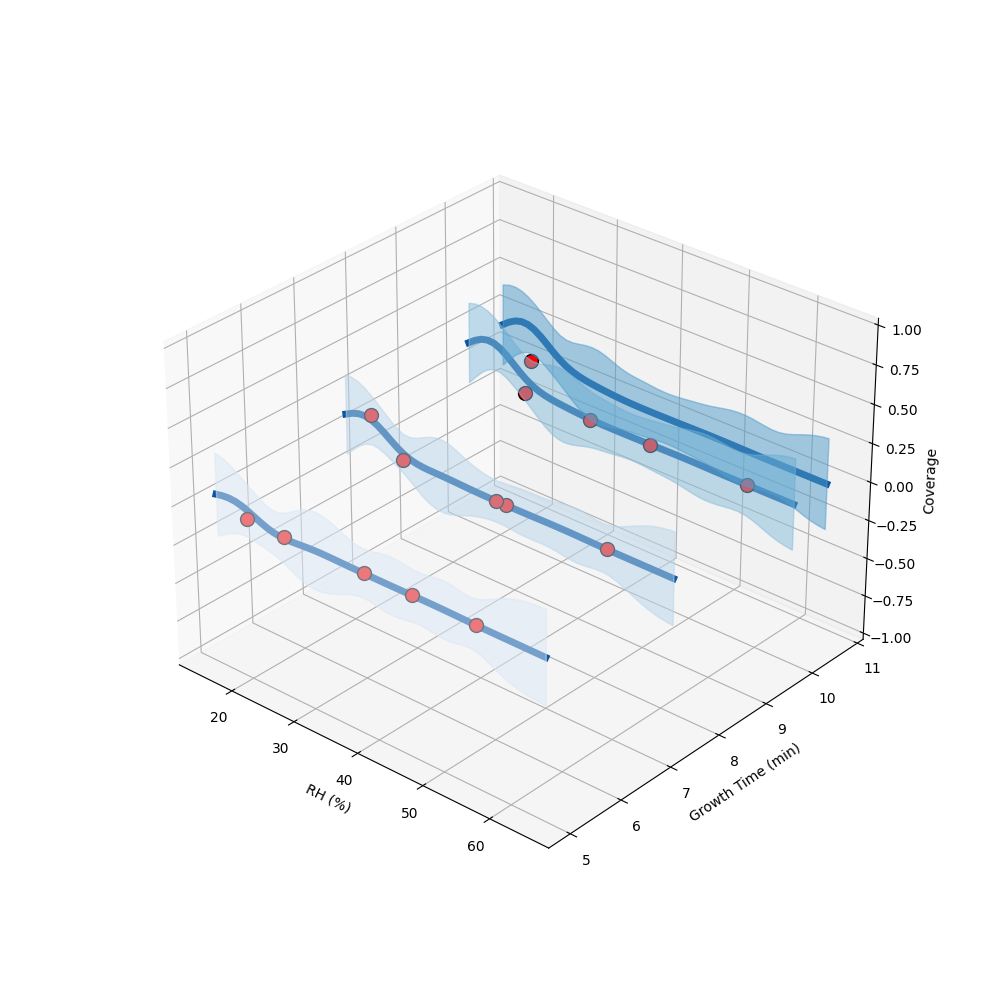

(-1.0, 1.0)

In [84]:
# Fig 3: G Flow = 500; C/G CH4 = 1

pl.figure(figsize=(10,10))
ax = pl.subplot(projection='3d')

ax.plot(x, y002, z002, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y102, z102, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y202, z202, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y302, z302, color=sns.color_palette("Blues")[5], linewidth = 5)

ax.add_collection3d(pl.fill_between(x, (z002 - 1.9602*s002), (z002 + 1.9602*s002), color=sns.color_palette("Blues")[0], alpha=0.3), zs=time_val[0], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z102 - 1.9602*s102), (z102 + 1.9602*s102), color=sns.color_palette("Blues")[1], alpha=0.3), zs=time_val[1], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z202 - 1.9602*s202), (z202 + 1.9602*s202), color=sns.color_palette("Blues")[2], alpha=0.3), zs=time_val[2], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z302 - 1.9602*s302), (z302 + 1.9602*s302), color=sns.color_palette("Blues")[3], alpha=0.3), zs=time_val[3], zdir='y')

ax.plot(exp_df_c2_g0["RH"], exp_df_c2_g0["Time"], exp_df_c2_g0["y"],'ro', markersize=10, label='Observations', mew=1, mec='k')

# ax.plot(Xsamples[ix][0], Xsamples[ix][2], ypred[ix][0],'go', markersize=15, label='Observations', mew=1, mec='k')

ax.set_xlabel('RH (%)')
ax.set_ylabel("Growth Time (min)")
ax.set_zlabel('Coverage')

ax.set_zlim(-1,1)

<IPython.core.display.Javascript object>


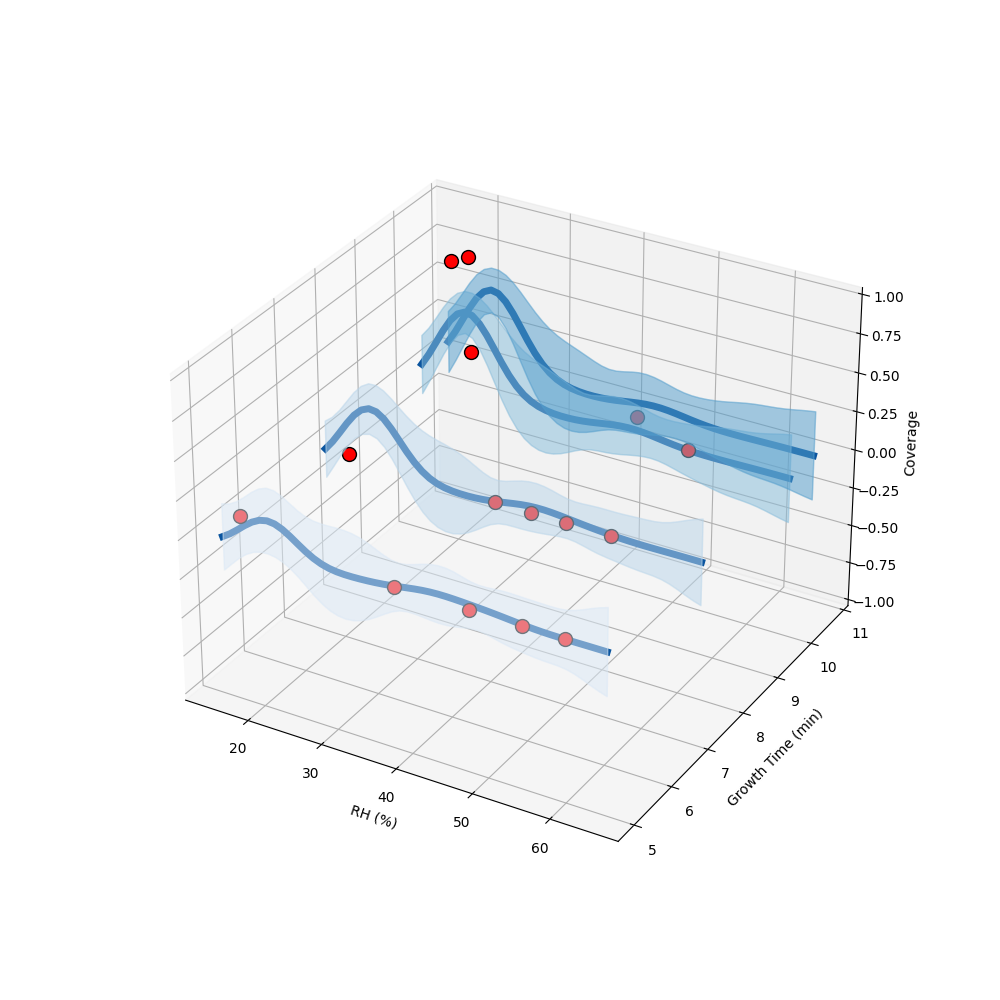

(-1.0, 1.0)

In [85]:
# Fig 4: G Flow = 1000; C/G CH4 = 0

pl.figure(figsize=(10,10))
ax = pl.subplot(projection='3d')

ax.plot(x, y010, z010, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y110, z110, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y210, z210, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y310, z310, color=sns.color_palette("Blues")[5], linewidth = 5)

ax.add_collection3d(pl.fill_between(x, (z010 - 1.9602*s010), (z010 + 1.9602*s010), color=sns.color_palette("Blues")[0], alpha=0.3), zs=time_val[0], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z110 - 1.9602*s110), (z110 + 1.9602*s110), color=sns.color_palette("Blues")[1], alpha=0.3), zs=time_val[1], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z210 - 1.9602*s210), (z210 + 1.9602*s210), color=sns.color_palette("Blues")[2], alpha=0.3), zs=time_val[2], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z310 - 1.9602*s310), (z310 + 1.9602*s310), color=sns.color_palette("Blues")[3], alpha=0.3), zs=time_val[3], zdir='y')

ax.plot(exp_df_c0_g1["RH"], exp_df_c0_g1["Time"], exp_df_c0_g1["y"],'ro', markersize=10, label='Observations', mew=1, mec='k')

# ax.plot(Xsamples[ix][0], Xsamples[ix][2], ypred[ix][0],'go', markersize=15, label='Observations', mew=1, mec='k')

ax.set_xlabel('RH (%)')
ax.set_ylabel("Growth Time (min)")
ax.set_zlabel('Coverage')

ax.set_zlim(-1,1)

<IPython.core.display.Javascript object>


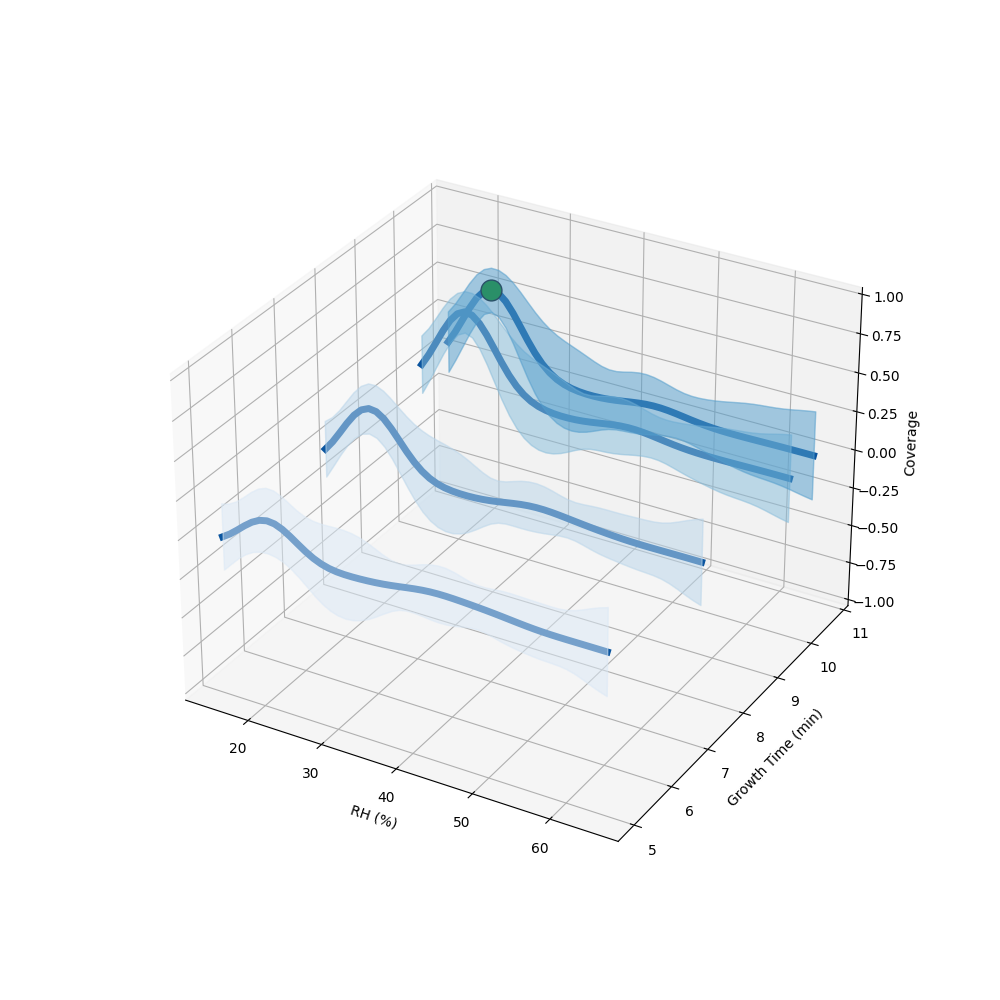

(-1.0, 1.0)

In [87]:
# Fig 5: G Flow = 1000; C/G CH4 = 0.347

pl.figure(figsize=(10,10))
ax = pl.subplot(projection='3d')

ax.plot(x, y011, z011, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y111, z111, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y211, z211, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y311, z311, color=sns.color_palette("Blues")[5], linewidth = 5)

ax.add_collection3d(pl.fill_between(x, (z011 - 1.9602*s011), (z010 + 1.9602*s011), color=sns.color_palette("Blues")[0], alpha=0.3), zs=time_val[0], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z111 - 1.9602*s111), (z110 + 1.9602*s111), color=sns.color_palette("Blues")[1], alpha=0.3), zs=time_val[1], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z211 - 1.9602*s211), (z210 + 1.9602*s211), color=sns.color_palette("Blues")[2], alpha=0.3), zs=time_val[2], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z311 - 1.9602*s311), (z310 + 1.9602*s311), color=sns.color_palette("Blues")[3], alpha=0.3), zs=time_val[3], zdir='y')

ax.plot(exp_df_c1_g1["RH"], exp_df_c1_g1["Time"], exp_df_c1_g1["y"],'ro', markersize=10, label='Observations', mew=1, mec='k')

ax.plot(Xsamples[ix][0], Xsamples[ix][1], ypred[ix][0],'go', markersize=15, label='Observations', mew=1, mec='k')

ax.set_xlabel('RH (%)')
ax.set_ylabel("Growth Time (min)")
ax.set_zlabel('Coverage')

ax.set_zlim(-1,1)

<IPython.core.display.Javascript object>


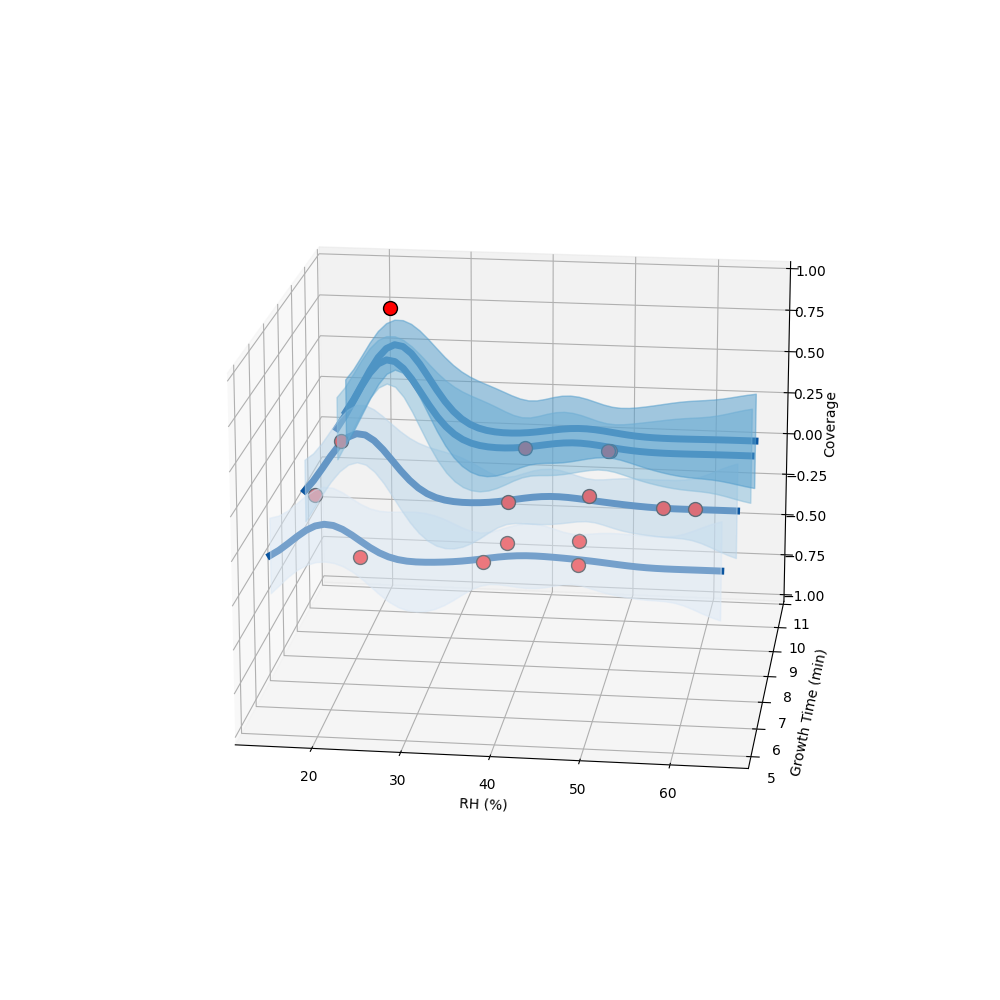

(-1.0, 1.0)

In [88]:
# Fig 6: G Flow = 1000; C/G CH4 = 1

pl.figure(figsize=(10,10))
ax = pl.subplot(projection='3d')

ax.plot(x, y012, z012, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y112, z112, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y212, z212, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y312, z312, color=sns.color_palette("Blues")[5], linewidth = 5)

ax.add_collection3d(pl.fill_between(x, (z012 - 1.9602*s012), (z012 + 1.9602*s012), color=sns.color_palette("Blues")[0], alpha=0.3), zs=time_val[0], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z112 - 1.9602*s112), (z112 + 1.9602*s112), color=sns.color_palette("Blues")[1], alpha=0.3), zs=time_val[1], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z212 - 1.9602*s212), (z212 + 1.9602*s212), color=sns.color_palette("Blues")[2], alpha=0.3), zs=time_val[2], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z312 - 1.9602*s312), (z312 + 1.9602*s312), color=sns.color_palette("Blues")[3], alpha=0.3), zs=time_val[3], zdir='y')

ax.plot(exp_df_c2_g1["RH"], exp_df_c2_g1["Time"], exp_df_c2_g1["y"],'ro', markersize=10, label='Observations', mew=1, mec='k')

# ax.plot(Xsamples[ix][0], Xsamples[ix][2], ypred[ix][0],'go', markersize=15, label='Observations', mew=1, mec='k')

ax.set_xlabel('RH (%)')
ax.set_ylabel("Growth Time (min)")
ax.set_zlabel('Coverage')

ax.set_zlim(-1,1)

### Input Parameters: [Growth Time * Growth CH4 Flow Rate], Relative Humidity, Cool/Grow CH4

### Output Parameter: Coverage

60 points

In [3]:
# Load the data
df = pd.read_csv("../data/DoE_Data_1_4.csv", index_col=0)
# Drop experiments without a value for %RH
df = df.dropna()
# Select experiments upto Set 3
df4 = df.loc[(df["CP: Set No"]>3)]
# Reset indexing
df4 = df4.set_index([pd.Index(np.array(range(df4.shape[0])))])

df4

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,Res: pct. Coverage
0,20200921_1,09/21/20 17:00,25,25,0.01716,476.69884,0,0.00000,475.00000,5.0,7.10,22.5,37.040835,No,501.716,0.000034,0.000686,True,4,0.000000
1,20200921_2,09/21/20 20:20,25,25,0.01716,476.69884,25,0.01716,476.69884,5.0,7.98,23.0,38.158064,No,501.716,0.000034,0.000686,True,4,0.000000
2,20200922_1,09/22/20 0:50,50,50,0.03432,953.39768,50,0.03432,953.39768,5.0,8.76,22.5,41.467763,Yes,1003.432,0.000034,0.000686,True,4,0.108187
3,20200922_2,09/22/20 10:50,50,50,0.03432,953.39768,50,0.03432,953.39768,5.0,11.38,22.5,49.407540,Yes,1003.432,0.000034,0.000686,True,4,0.134163
4,20200922_3,09/22/20 14:25,25,25,0.01716,476.69884,0,0.00000,475.00000,5.0,11.24,23.0,47.489815,No,501.716,0.000034,0.000686,True,4,0.000000
5,20200922_4,09/22/20 20:30,25,25,0.01716,476.69884,25,0.01716,476.69884,5.0,10.82,23.3,45.354451,No,501.716,0.000034,0.000686,True,4,0.000000
6,20200923_2,09/23/20 21:45,25,25,0.01716,476.69884,0,0.00000,475.00000,7.5,9.92,22.9,43.757547,No,501.716,0.000034,0.000686,True,4,0.000000
7,20200924_1,09/24/20 0:45,50,50,0.03432,953.39768,0,0.00000,950.00000,10.0,10.34,23.0,44.731545,Yes,1003.432,0.000034,0.000686,True,4,0.126065
8,20200924_3,09/24/20 7:00,50,50,0.03432,953.39768,50,0.03432,953.39768,7.5,11.40,23.0,47.995561,Yes,1003.432,0.000034,0.000686,True,4,0.054047
9,20200924_4,09/24/20 11:00,50,50,0.03432,953.39768,50,0.03432,953.39768,10.0,11.60,23.2,48.049708,No,1003.432,0.000034,0.000686,True,4,0.000000


In [8]:
# Create new dataframe with the experiment ID, output, continuous inputs and discrete inputs (in that order)
pidf4 = df4[["ID"]].copy()
pidf4["Coverage"] = df4["Res: pct. Coverage"]
pidf4["RH"] = df4["Relative Humidity (pct)"]
pidf4["Total CH4 volume"] = df4["Growth CH4 (sccm)"]*df4["Growth Time (min)"]
pidf4["Cool/Grow CH4"] = df4["Cooling CH4 (sccm)"]/df4["Growth CH4 (sccm)"]

pidf4

,ID,Coverage,RH,Total CH4 volume,Cool/Grow CH4
0,20200921_1,0.000000,37.040835,0.0858,0.0
1,20200921_2,0.000000,38.158064,0.0858,1.0
2,20200922_1,0.108187,41.467763,0.1716,1.0
3,20200922_2,0.134163,49.407540,0.1716,1.0
4,20200922_3,0.000000,47.489815,0.0858,0.0
5,20200922_4,0.000000,45.354451,0.0858,1.0
6,20200923_2,0.000000,43.757547,0.1287,0.0
7,20200924_1,0.126065,44.731545,0.3432,0.0
8,20200924_3,0.054047,47.995561,0.2574,1.0
9,20200924_4,0.000000,48.049708,0.3432,1.0


In [9]:
X = pidf4.iloc[:,2:].to_numpy()
y = pidf4.iloc[:,1:2].to_numpy()
print(X.shape)
print(y.shape)

(60, 3)
(60, 1)


In [20]:
xrange = np.array([[15.0,65.0], # RH (%)
                   [0.0,0.9], # Total CH4 volume (scc)
                   [0.0,1.0]]) # C CH4 / G CH4

In [21]:
# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with catch_warnings():
        # ignore generated warnings
        simplefilter("ignore")
        return model.predict(X, return_std=True)

In [22]:
kernels = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernels, n_restarts_optimizer=9, alpha=0.025)
# fit the model
gp.fit(X, y)

GaussianProcessRegressor(alpha=0.025, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [23]:
meshdensity = 200

# time_line = np.sort(np.concatenate((np.linspace(xrange[1,0], xrange[1,1], meshdensity),np.unique(X[:,1]))))

# plot the surrogate function
grid = np.meshgrid(*[np.sort(np.unique(np.concatenate((np.linspace(xrange[i,0], xrange[i,1], meshdensity),np.unique(X[:,i]))))) if np.unique(X[:,i]).shape[0]<=10 else np.linspace(xrange[i,0], xrange[i,1], meshdensity) for i in range(xrange.shape[0])])
Xmesh = np.concatenate(([np.atleast_2d(grid[i].ravel()).T for i in range(X.shape[1])]), axis=1)
ypred, ystd = surrogate(gp,Xmesh)

In [24]:
# calculate the acquisition function for each sample
# scores = acquisition(X, Xsamples, gp)
yhat, ybar = surrogate(gp, X)
best = max(yhat)
# calculate mean and stdev via surrogate function
Xsamples = Xmesh
mu = ypred
std = ystd
# calculate the probability of improvement
scores = norm.cdf((mu - best) / (np.atleast_2d(std+1E-9).T))

# locate the index of the largest scores
ix = np.argmax(scores)

In [25]:
print("[RH, Total CH4 volume, C/G CH4]: ", Xsamples[ix])

[RH, Total CH4 volume, C/G CH4]:  [20.52763819  0.5879397   0.07035176]


In [32]:
plot_df = pd.DataFrame(np.concatenate((Xmesh, np.atleast_2d(ypred), np.atleast_2d(ystd).T), axis=1), columns=["RH","Total CH4 volume", "C/G CH4", "ypred","ystd"])
plot_df

,RH,Total CH4 volume,C/G CH4,ypred,ystd
0,15.0,0.0,0.000000,0.001019,0.094672
1,15.0,0.0,0.005025,0.000974,0.094621
2,15.0,0.0,0.010050,0.000928,0.094569
3,15.0,0.0,0.015075,0.000882,0.094518
4,15.0,0.0,0.020101,0.000836,0.094467
...,...,...,...,...,...
8199995,65.0,0.9,0.979899,-0.000014,0.128858
8199996,65.0,0.9,0.984925,-0.000014,0.128859
8199997,65.0,0.9,0.989950,-0.000014,0.128859
8199998,65.0,0.9,0.994975,-0.000014,0.128859


In [33]:
total_ch4_val = np.unique(np.sort(np.append(np.unique(X[:,1]),Xsamples[ix][1])))
cgch4_val = np.unique(np.sort(np.append(np.unique(X[:,2]),Xsamples[ix][2])))
print(total_ch4_val)
print(cgch4_val)

[0.0858    0.1287    0.1716    0.2574    0.3432    0.5879397]
[0.         0.07035176 1.        ]


In [34]:
exp_df = pd.DataFrame(np.concatenate((X, np.atleast_2d(y)), axis=1), columns=["RH","Total CH4 volume","C/G CH4","y"])

exp_df_cg0 = exp_df[(exp_df["C/G CH4"]==cgch4_val[0])]
exp_df_cg1 = exp_df[(exp_df["C/G CH4"]==cgch4_val[1])]
exp_df_cg2 = exp_df[(exp_df["C/G CH4"]==cgch4_val[2])]


print(exp_df.shape)
print(exp_df_cg0.shape)
print(exp_df_cg1.shape)
print(exp_df_cg2.shape)

(60, 4)
(30, 4)
(0, 4)
(30, 4)


In [36]:
x   = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["RH"])

y00  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Total CH4 volume"])
y10  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Total CH4 volume"])
y20  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[2]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Total CH4 volume"])
y30  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[3]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Total CH4 volume"])
y40  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[4]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Total CH4 volume"])
y50  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[5]) & (plot_df["C/G CH4"]==cgch4_val[0])]["Total CH4 volume"])

y01  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Total CH4 volume"])
y11  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Total CH4 volume"])
y21  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[2]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Total CH4 volume"])
y31  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[3]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Total CH4 volume"])
y41  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[4]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Total CH4 volume"])
y51  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[5]) & (plot_df["C/G CH4"]==cgch4_val[1])]["Total CH4 volume"])

y02  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Total CH4 volume"])
y12  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Total CH4 volume"])
y22  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[2]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Total CH4 volume"])
y32  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[3]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Total CH4 volume"])
y42  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[4]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Total CH4 volume"])
y52  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[5]) & (plot_df["C/G CH4"]==cgch4_val[2])]["Total CH4 volume"])

z00  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])
z10  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])
z20  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[2]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])
z30  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[3]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])
z40  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[4]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])
z50  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[5]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ypred"])

z01  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])
z11  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])
z21  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[2]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])
z31  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[3]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])
z41  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[4]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])
z51  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[5]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ypred"])

z02  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])
z12  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])
z22  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[2]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])
z32  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[3]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])
z42  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[4]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])
z52  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[5]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ypred"])

s00  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[0]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])
s10  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[1]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])
s20  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[2]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])
s30  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[3]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])
s40  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[4]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])
s50  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[5]) & (plot_df["C/G CH4"]==cgch4_val[0])]["ystd"])

s01  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[0]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])
s11  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[1]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])
s21  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[2]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])
s31  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[3]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])
s41  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[4]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])
s51  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[5]) & (plot_df["C/G CH4"]==cgch4_val[1])]["ystd"])

s02  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[0]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])
s12  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[1]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])
s22  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[2]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])
s32  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[3]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])
s42  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[4]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])
s52  = np.array(plot_df[(plot_df["Total CH4 volume"]==total_ch4_val[5]) & (plot_df["C/G CH4"]==cgch4_val[2])]["ystd"])

<IPython.core.display.Javascript object>


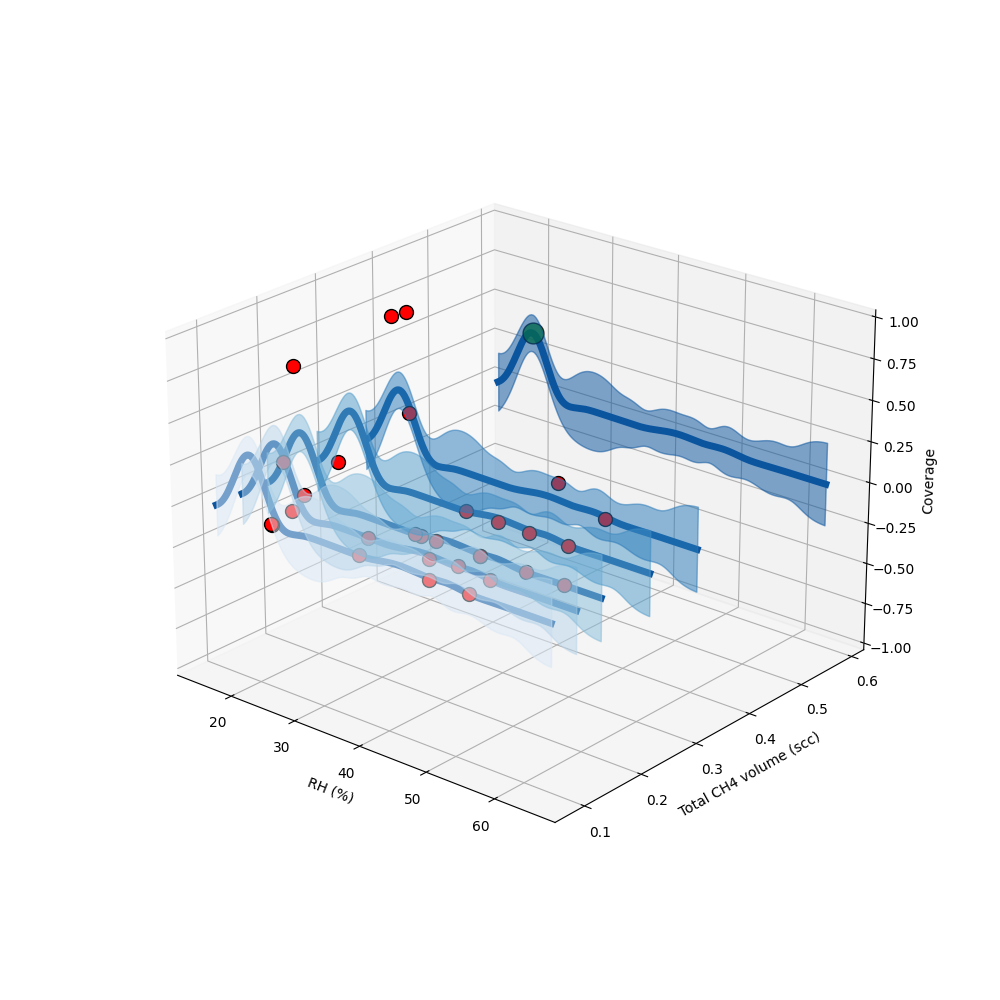

(-1.0, 1.0)

In [43]:
# Fig 1: C/G CH4 = 0

pl.figure(figsize=(10,10))
ax = pl.subplot(projection='3d')

ax.plot(x, y00, z00, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y10, z10, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y20, z20, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y30, z30, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y40, z40, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y50, z50, color=sns.color_palette("Blues")[5], linewidth = 5)


ax.add_collection3d(pl.fill_between(x, (z00 - 1.9602*s00), (z00 + 1.9602*s00), color=sns.color_palette("Blues")[0], alpha=0.3), zs=total_ch4_val[0], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z10 - 1.9602*s10), (z10 + 1.9602*s10), color=sns.color_palette("Blues")[1], alpha=0.3), zs=total_ch4_val[1], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z20 - 1.9602*s20), (z20 + 1.9602*s20), color=sns.color_palette("Blues")[2], alpha=0.3), zs=total_ch4_val[2], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z30 - 1.9602*s30), (z30 + 1.9602*s30), color=sns.color_palette("Blues")[3], alpha=0.3), zs=total_ch4_val[3], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z40 - 1.9602*s40), (z40 + 1.9602*s40), color=sns.color_palette("Blues")[4], alpha=0.3), zs=total_ch4_val[4], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z50 - 1.9602*s50), (z50 + 1.9602*s50), color=sns.color_palette("Blues")[5], alpha=0.3), zs=total_ch4_val[5], zdir='y')

ax.plot(exp_df_cg0["RH"], exp_df_cg0["Total CH4 volume"], exp_df_cg0["y"],'ro', markersize=10, label='Observations', mew=1, mec='k')

ax.plot(Xsamples[ix][0], Xsamples[ix][1], ypred[ix][0],'go', markersize=15, label='Observations', mew=1, mec='k', alpha=0.8)

ax.set_xlabel('RH (%)')
ax.set_ylabel("Total CH4 volume (scc)")
ax.set_zlabel('Coverage')

ax.set_zlim(-1,1)

<IPython.core.display.Javascript object>


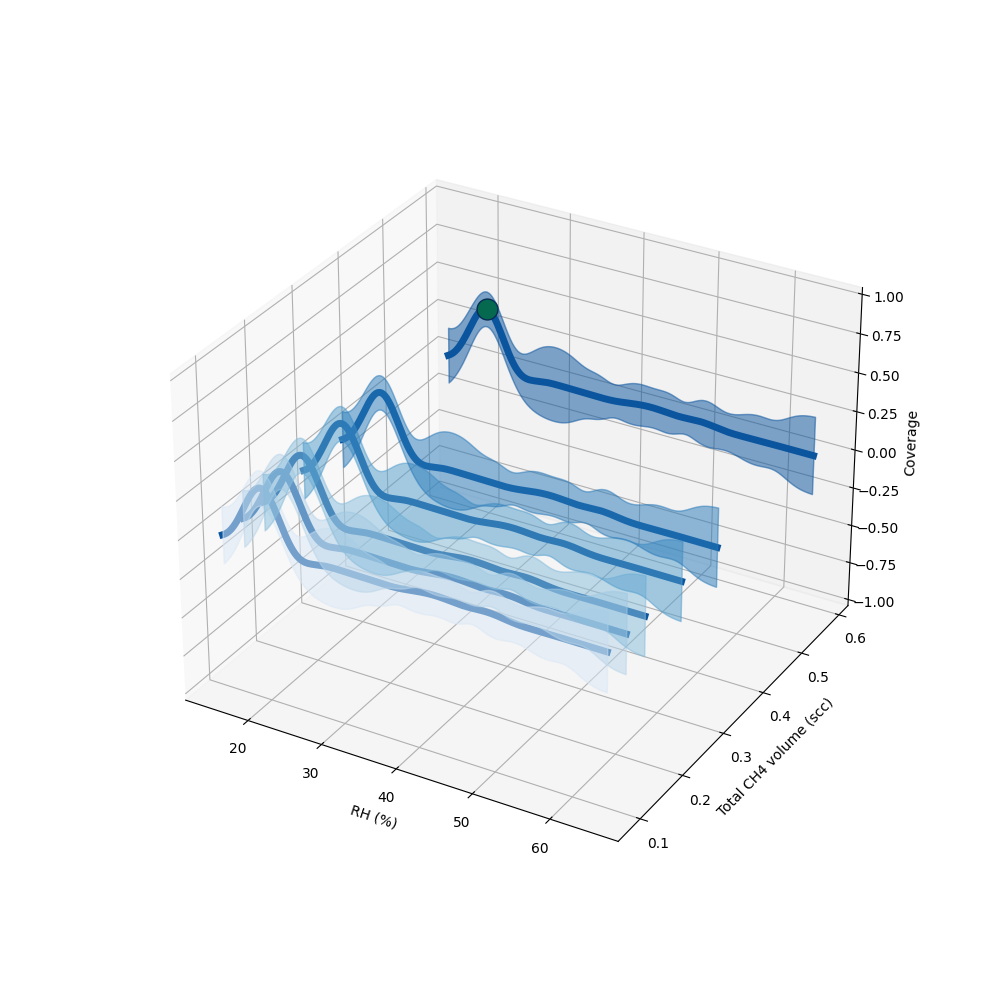

(-1.0, 1.0)

In [38]:
# Fig 2: C/G CH4 = 0.07035176

pl.figure(figsize=(10,10))
ax = pl.subplot(projection='3d')

ax.plot(x, y01, z01, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y11, z11, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y21, z21, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y31, z31, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y41, z41, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y51, z51, color=sns.color_palette("Blues")[5], linewidth = 5)


ax.add_collection3d(pl.fill_between(x, (z01 - 1.9602*s01), (z01 + 1.9602*s01), color=sns.color_palette("Blues")[0], alpha=0.3), zs=total_ch4_val[0], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z11 - 1.9602*s11), (z11 + 1.9602*s11), color=sns.color_palette("Blues")[1], alpha=0.3), zs=total_ch4_val[1], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z21 - 1.9602*s21), (z21 + 1.9602*s21), color=sns.color_palette("Blues")[2], alpha=0.3), zs=total_ch4_val[2], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z31 - 1.9602*s31), (z31 + 1.9602*s31), color=sns.color_palette("Blues")[3], alpha=0.3), zs=total_ch4_val[3], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z41 - 1.9602*s41), (z41 + 1.9602*s41), color=sns.color_palette("Blues")[4], alpha=0.3), zs=total_ch4_val[4], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z51 - 1.9602*s51), (z51 + 1.9602*s51), color=sns.color_palette("Blues")[5], alpha=0.3), zs=total_ch4_val[5], zdir='y')

ax.plot(exp_df_cg1["RH"], exp_df_cg1["Total CH4 volume"], exp_df_cg1["y"],'ro', markersize=10, label='Observations', mew=1, mec='k')

ax.plot(Xsamples[ix][0], Xsamples[ix][1], ypred[ix][0],'go', markersize=15, label='Observations', mew=1, mec='k')

ax.set_xlabel('RH (%)')
ax.set_ylabel("Total CH4 volume (scc)")
ax.set_zlabel('Coverage')

ax.set_zlim(-1,1)

<IPython.core.display.Javascript object>


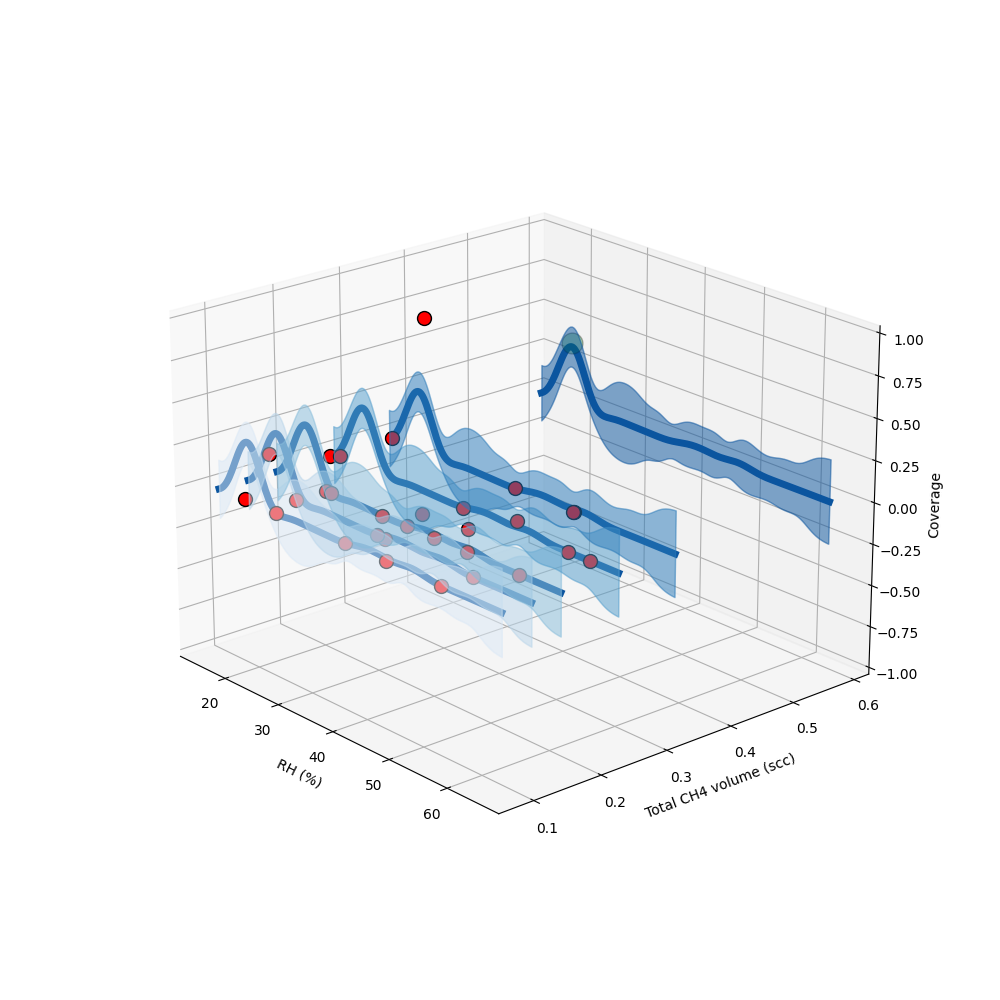

(-1.0, 1.0)

In [44]:
# Fig 3: C/G CH4 = 0.07035176

pl.figure(figsize=(10,10))
ax = pl.subplot(projection='3d')

ax.plot(x, y02, z02, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y12, z12, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y22, z22, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y32, z32, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y42, z42, color=sns.color_palette("Blues")[5], linewidth = 5)
ax.plot(x, y52, z52, color=sns.color_palette("Blues")[5], linewidth = 5)


ax.add_collection3d(pl.fill_between(x, (z02 - 1.9602*s02), (z02 + 1.9602*s02), color=sns.color_palette("Blues")[0], alpha=0.3), zs=total_ch4_val[0], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z12 - 1.9602*s12), (z12 + 1.9602*s12), color=sns.color_palette("Blues")[1], alpha=0.3), zs=total_ch4_val[1], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z22 - 1.9602*s22), (z22 + 1.9602*s22), color=sns.color_palette("Blues")[2], alpha=0.3), zs=total_ch4_val[2], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z32 - 1.9602*s32), (z32 + 1.9602*s32), color=sns.color_palette("Blues")[3], alpha=0.3), zs=total_ch4_val[3], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z42 - 1.9602*s42), (z42 + 1.9602*s42), color=sns.color_palette("Blues")[4], alpha=0.3), zs=total_ch4_val[4], zdir='y')
ax.add_collection3d(pl.fill_between(x, (z52 - 1.9602*s52), (z52 + 1.9602*s52), color=sns.color_palette("Blues")[5], alpha=0.3), zs=total_ch4_val[5], zdir='y')

ax.plot(exp_df_cg2["RH"], exp_df_cg2["Total CH4 volume"], exp_df_cg2["y"],'ro', markersize=10, label='Observations', mew=1, mec='k')

ax.plot(Xsamples[ix][0], Xsamples[ix][1], ypred[ix][0],'go', markersize=15, label='Observations', mew=1, mec='k', alpha=0.3)

ax.set_xlabel('RH (%)')
ax.set_ylabel("Total CH4 volume (scc)")
ax.set_zlabel('Coverage')

ax.set_zlim(-1,1)

In [48]:
np.concatenate((Xmesh, X), axis=0).shape

(8200060, 3)